# WINE QUALITY PREDICTION USING MACHINE LEARNING

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import files

wineqt = files.upload()

Saving WineQT.csv to WineQT (1).csv


In [ ]:
# Get the data
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.shape

(1143, 13)

# Data Pre-processing

In [ ]:
# Check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Our data has no missing values hence ready for an further analysis and we dont have to deal with missing values.

In [ ]:
# Creates a colum in the original dataset that categorises the quality of wine either as being 'bad', 'good' or 'premium' wine.
df["quality_cat"] = pd.cut(df.quality, bins = [0,5,7,10], 
                             labels = ["bad", "good", "premium"])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,bad


# Descriptive Statistics

In [ ]:
# Data Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


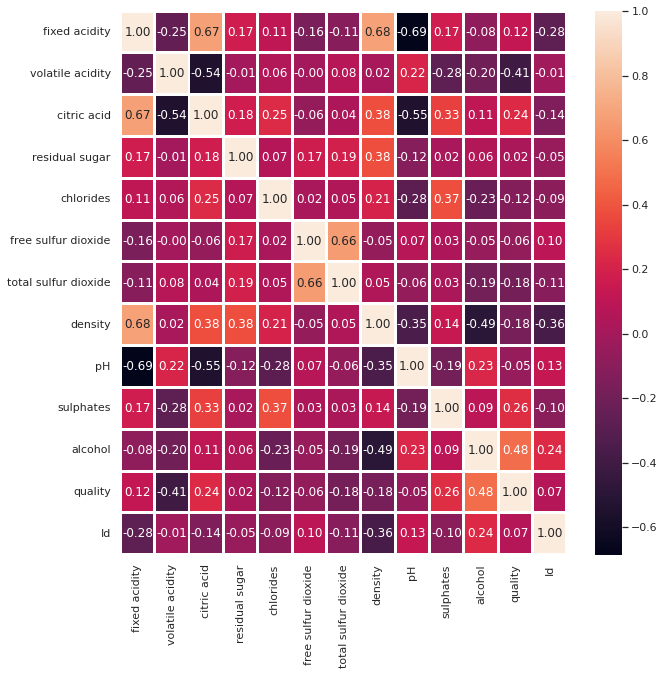

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidth=2)

From the above plot, we can easily that:
* fixed acidity, citric acid, residual sugar, sulphates and alcohol content have a positive correlation with the quality of wine produced. This implies that, as they increase, so does the quality of wine produced increase.

* volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, density and pH have a negative correlation to wine. This implies that, the qaulity of wine decreases as they descrease.

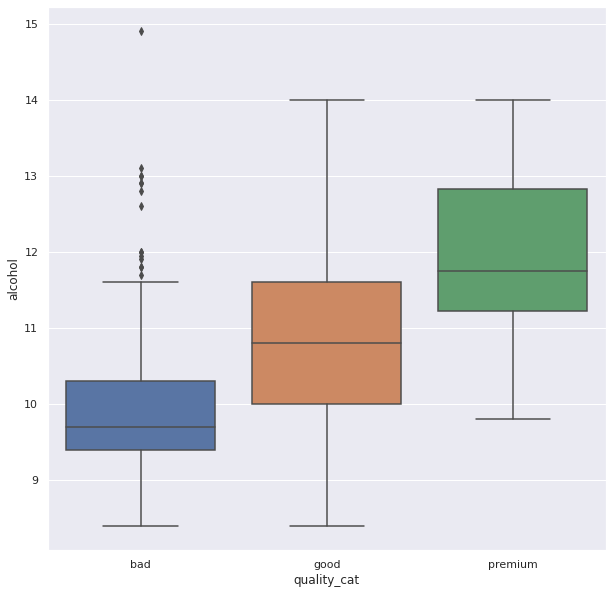

In [ ]:
sns.boxplot(x='quality_cat', y='alcohol', data = df)

From the above box plot, we can say that, this company is doing a great job in producing more premium quality wine than the bad wine in relation to alcohol content.

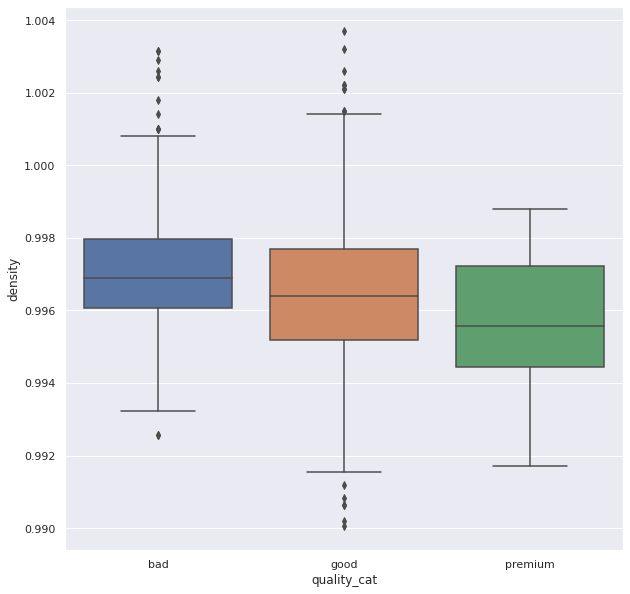

In [ ]:
sns.boxplot(x='quality_cat', y='density', data = df)

As median density decreases, it results in the reduction of the quality of wine produced as it is evident in the above box plot.

In [ ]:
df.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
Id                         int64
quality_cat             category
dtype: object

# Building a Classification model

## 1. Multi Class Logistic Regression

In [ ]:
# drop quality and id
data = df.drop(['quality', 'Id'], axis=1)

In [ ]:
# Separate features and labels
from sklearn.model_selection import train_test_split

data_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

data_label = ['quality_cat']

# Separate features and labels
data_X, data_y = data[data_features].values, data[data_label].values

# Split data 67%-33% into training set and test set
x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(data_X, data_y, test_size = 0.33, random_state = 0, stratify = data_y)

print ('Training Set: %d, Test Set: %d \n' % (x_data_train.shape[0], x_data_test.shape[0]))

Training Set: 765, Test Set: 378 



In [ ]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', 
                                 max_iter=10000).fit(x_data_train, y_data_train)

print (multi_model)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10.0, max_iter=10000)


In [ ]:
# now we can use the trained model to test the labels on the test data set

quality_predictions = multi_model.predict(x_data_test)
print('Predicted labels: ', quality_predictions[:15])
print('Actual labels   : ' ,y_data_test[:15])

Predicted labels:  ['good' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'bad' 'bad' 'bad' 'good'
 'bad' 'bad' 'bad' 'bad']
Actual labels   :  [['bad']
 ['bad']
 ['bad']
 ['good']
 ['good']
 ['bad']
 ['good']
 ['bad']
 ['good']
 ['bad']
 ['bad']
 ['good']
 ['bad']
 ['bad']
 ['good']]


## Evaluation

In [ ]:
# Classification report
from sklearn. metrics import classification_report

print(classification_report(y_data_test, quality_predictions))

              precision    recall  f1-score   support

         bad       0.77      0.73      0.75       173
        good       0.76      0.81      0.78       200
     premium       0.00      0.00      0.00         5

    accuracy                           0.76       378
   macro avg       0.51      0.51      0.51       378
weighted avg       0.75      0.76      0.76       378



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_data_test, quality_predictions))
print("Overall Precision:",precision_score(y_data_test, quality_predictions, average = 'macro'))
print("Overall Recall:",recall_score(y_data_test, quality_predictions, average = 'macro'))

Overall Accuracy: 0.7619047619047619
Overall Precision: 0.5081647344093354
Overall Recall: 0.5130346820809248


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_data_test, quality_predictions)
print(mcm)

[[127  46   0]
 [ 39 161   0]
 [  0   5   0]]


From the confusion matrix above, we can say that the logistic regression made 240 correct predictions with a precision score of approximately 51%.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(x_data_train, y_data_train)
rf_quality_pred = rf_model.predict(x_data_test)
print(classification_report(y_data_test, rf_quality_pred))

<ipython-input-19-4413c1609b4d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_data_train, y_data_train)


              precision    recall  f1-score   support

         bad       0.83      0.72      0.77       173
        good       0.77      0.88      0.82       200
     premium       1.00      0.20      0.33         5

    accuracy                           0.80       378
   macro avg       0.87      0.60      0.64       378
weighted avg       0.80      0.80      0.79       378



In [ ]:
print("Overall Accuracy:",accuracy_score(y_data_test, rf_quality_pred))
print("Overall Precision:",precision_score(y_data_test, rf_quality_pred, average = 'macro'))
print("Overall Recall:",recall_score(y_data_test, rf_quality_pred, average = 'macro'))

Overall Accuracy: 0.7962962962962963
Overall Precision: 0.8680861478218307
Overall Recall: 0.5991811175337187


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_data_test, rf_quality_pred)
print(mcm)

[[125  48   0]
 [ 25 175   0]
 [  0   4   1]]


The above confusion matrix shows that there were 301 correct predictions by random forest model with a precision score of approximately 87%.

## 3. Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(x_data_train, y_data_train)
dt_quality_pred = dt_model.predict(x_data_test)
print(classification_report(y_data_test, dt_quality_pred))

              precision    recall  f1-score   support

         bad       0.76      0.65      0.70       173
        good       0.73      0.81      0.76       200
     premium       0.20      0.40      0.27         5

    accuracy                           0.73       378
   macro avg       0.56      0.62      0.58       378
weighted avg       0.74      0.73      0.73       378



In [ ]:
print("Overall Accuracy:",accuracy_score(y_data_test, dt_quality_pred))
print("Overall Precision:",precision_score(y_data_test, dt_quality_pred, average = 'macro'))
print("Overall Recall:",recall_score(y_data_test, dt_quality_pred, average = 'macro'))

Overall Accuracy: 0.7275132275132276
Overall Precision: 0.5634705164116929
Overall Recall: 0.617466281310212


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_data_test, dt_quality_pred)
print(mcm)

[[112  59   2]
 [ 33 161   6]
 [  2   1   2]]


There were 275 correct predictions by the decision trees model with a precision score of 56%

# Conclusion
From the three models evaluated, random forest came out the best a precision score of 87% and 301 correct predictions about the quality of wine.